# Analyzing and visualizing Data


In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('twitter-archive-master.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 12 columns):
tweet_id              1282 non-null int64
jpg_url               1282 non-null object
timestamp             1282 non-null object
source                1282 non-null object
text                  1282 non-null object
rating_numerator      1282 non-null float64
rating_denominator    1282 non-null float64
name                  1282 non-null object
retweet_count         1282 non-null int64
favorite_count        1282 non-null int64
stage                 1282 non-null object
dog_stage             0 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 120.3+ KB


In [3]:
df.head()

,tweet_id,jpg_url,timestamp,source,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,dog_stage
0,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,2015-11-16 01:52:02,['Twitter for iPhone'],Here we have a northern speckled Rhododendron....,9.0,10.0,None,67,154,NoneNoneNoneNone,NaN
1,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,2015-11-16 01:59:36,['Twitter for iPhone'],Let's hope this flight isn't Malaysian (lol). ...,10.0,10.0,None,174,335,NoneNoneNoneNone,NaN
2,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,2015-11-16 03:44:34,['Twitter for iPhone'],Can stand on stump for what seems like a while...,8.0,10.0,None,73,164,NoneNoneNoneNone,NaN
3,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,2015-11-16 03:55:04,['Twitter for iPhone'],Oh my. Here you are seeing an Adobe Setter giv...,11.0,10.0,None,16,81,NoneNoneNoneNone,NaN
4,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,2015-11-16 04:02:55,['Twitter for iPhone'],Not familiar with this breed. No tail (weird)....,1.0,10.0,None,6871,14765,NoneNoneNoneNone,NaN


In [4]:
#converting columns into their types 
df['tweet_id'] = df['tweet_id'].astype(object)

df['timestamp'] = pd.to_datetime(df.timestamp)

df['source'] = df['source'].astype('category')

df['stage'] = df['stage'].astype('category')




In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 12 columns):
tweet_id              1282 non-null object
jpg_url               1282 non-null object
timestamp             1282 non-null datetime64[ns]
source                1282 non-null category
text                  1282 non-null object
rating_numerator      1282 non-null float64
rating_denominator    1282 non-null float64
name                  1282 non-null object
retweet_count         1282 non-null int64
favorite_count        1282 non-null int64
stage                 1282 non-null category
dog_stage             0 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 103.2+ KB


# Visualization:

     After wrapping up the wrangling portion which is include gathering, surveying, and cleaning the given data, here we need to reply a few questions by utilizing visualizing. We utilized a few qualities after we had gathered, evaluated, and cleaned our data, such as, retweets rate, top choices rates, puppy categories and puppy names.

### What is the relationship between favorites and Retweets 

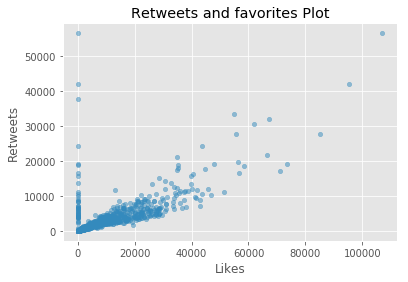

In [6]:
#Retweets vs. Likes

df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Plot')

plt.savefig('Retweets_vs_favorites.png', bbox_inches='tight')


    Retweets are positively agree with Likes

###### Plot the  relationship between variables 

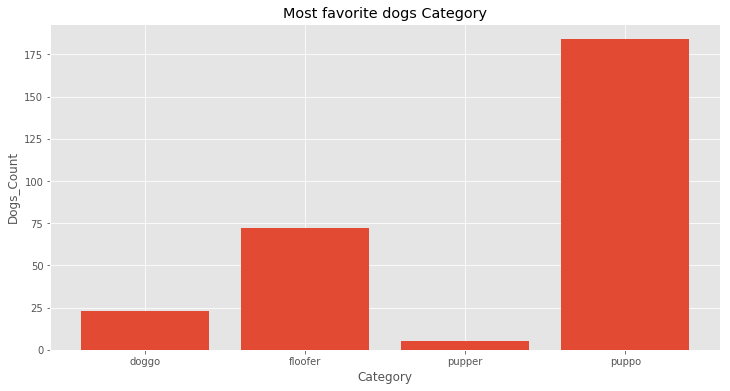

In [7]:
# Dogs types Vs dogs rate  

dogs_type = ['pupper','doggo','puppo','floofer']

dog_count = [5,23,184,72]


fig,ax = plt.subplots(figsize = (12,6))

ax.bar(dogs_type, dog_count, width = 0.8)

ax.set_ylabel('Dogs_Count')
ax.set_xlabel('Category')
plt.title('Most favorite dogs Category')
plt.show();

plt.savefig('Most_favorite_dogs.png', bbox_inches='tight')

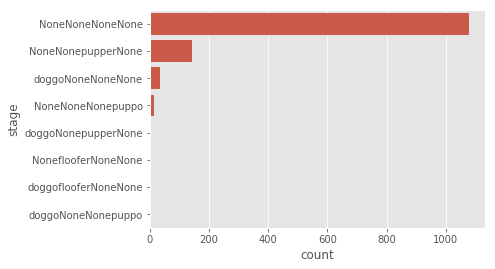

In [8]:
stage_count_type = df.stage.value_counts().index
base=sns.color_palette()[0]
sns.countplot(data = df ,y='stage',color=base,order=stage_count_type);#plotting

    Puppo is the most favorite dog 

###### Plot the rate between dogs type 

    The most common dog is Pupper.

## Top names in the dogs pet world with highest retweets rate

In [9]:

df.drop(df.query('(name == "None")').index ,inplace=True)

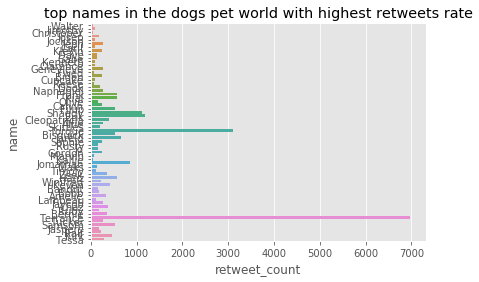

In [10]:
sns.barplot(y="name", x="retweet_count", data = df[0:60]).set_title('top names in the dogs pet world with highest retweets rate');




plt.savefig('Most_dog_Name.png', bbox_inches='tight')

## The relationship between the dog category with the highest favourites rate


In [11]:
df.drop(df.query('(stage == "None")').index ,inplace=True)

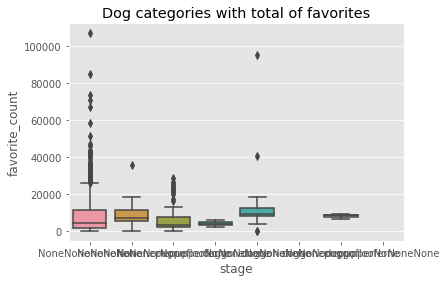

In [12]:
sns.boxplot(x="stage", y="favorite_count", data=df).set_title('Dog categories with total of favorites');

plt.savefig('relationship betweene.png', bbox_inches='tight')

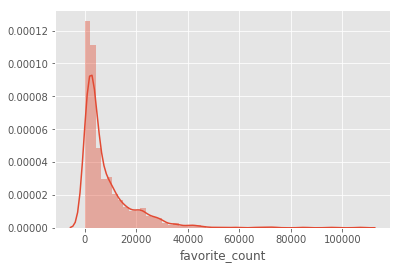

In [13]:
sns.distplot(df.favorite_count.dropna()); #plotting

## Conclusion 

The Twitter account of (@dogs_rates) is devoted to laughable reviewing pictures of dogs and their adorable photos 
    the rating on scale of one to ten . but more given rating in excess of the maximum 16/10. it has acquired over million of followers 
    
if I was thinking of adopting a dog I will definitely adopt a puppo. I hope this analysis makes understand what kind of pet you want to adopt



In [14]:
df.to_csv('twitter-archive-master.csv' , encoding = 'utf-8' , index = False)